<img src="./Topol/digital fellowships_linear.png" width="100%" align="left" />

<table style="float:right;">
    <tr>
        <td>                      
            <div style="text-align: right"><a href="https://alandavies.netlify.com" target="_blank">Dr Alan Davies</a></div>
            <div style="text-align: right">Lecturer health data science</div>
            <div style="text-align: right">University of Manchester</div>
         </td>
         <td>
             <img src="https://github.com/i3hsInnovation/resources/blob/efa61022d0b8893200dad308f6590e694291f8c7/images/alan.PNG?raw=true" width="30%" />
         </td>
     </tr>
</table>

# Linear Regression
****

#### About this Notebook
This notebook introduces a Machine Learning algorithm concept of Linear Regression, used in both traditional statistics and Machine Learning.. We will apply these algorithms to some real world data introduced in another notebook Working with Data .  

This notebook is at <code>Beginner</code> level and will take approximately 2 hours to complete. 

<div class="alert alert-block alert-warning"><b>Learning Objectives:</b> 
<br/> At the end of this notebook you will be able to:
    
- Investigate key features of Linear Regression in statistics and machine learning 

- Explore some essential Machine Learning Python libraries to implement Machine Learning algorithms

</div> 

<a id="top"></a>

<b>Table of contents</b><br/>

1.0 [Regression](#regression)

2.0 [Correlation](#correlation)

3.0 [Performing the Regression](#performingregression)

4.0 [Your Turn](#yourturn)

5.0 [Lasso and Ridge Regression](#lassoridgeregression)


## 1.0 Regression

Regression is a method used in statistics and machine learning to measure the linear relationship between a <code>dependent variable</code> (response) and an <code>independent variable(s)</code> (predictor). The word <code>linear</code> means arranged in a <code>line</code>. The simplest use of linear regression is to do this for one dependent variable and one or more independent variables. Regression has been around for quite a long time and has been attributed to Francis Galton in the later half of the 1800s in a paper called <i>Galton, F. (1886) Regression Towards Mediocrity in Hereditary Stature. Anthropological Miscellanea. pp246-263</i>. The term regression was used in the paper to describe regression towards the mean.

Simply put, regression will show how much one variable changes as another changes. Typically the variable we are trying to predict (the dependent variable) is referred to by $y$ and the predictor or explanatory variable (independent variable) is referred to by $x$.

<div class="alert alert-danger">
<strong>Note:</strong>
    To use Linear Regression there must be a linear relationship between the data used. The dependent variable should <strong>not</strong> be ordinal or nominal (there are other forms of regression to deal with variables of these types).
</div>

### 1.1 Uses of regression

We can use regression to describe relationships between dependent and independent variables. We can also use it to make predictions. Once we have trained a regression model we can use it on new data to make predictions. For example we might make a regression model to see the rate an ice-cream melts based on the temperature. We could input a temperature and see the resulting predicted melt rate. Linear regression requires us to have a dependent variable that is <code>Continuous</code>. These are variables on a scale (e.g. height, weight, temperature). 

You may remember seeing the equation for a straight line (or some variation): 

$$ y = mx + c $$

Here $m$ is the gradient (steepness) of the line. $c$ is where the line crosses the y-axis, known as the y-intercept. Let's have a go implementing this in Python. For now don't worry about trying to understand what each line of code does, as this is just for illustrative purposes. First we will import the libraries we need. Libraries contain pre-written functions for carrying out common tasks, in this case plotting graphs and numerical operations. 

In [71]:
import numpy as np
import matplotlib.pyplot as plt

The code below creates and positions a graph. The main lines of interest here are <code>x = np.linspace(-10,10,100)</code> which sets the range of the graph from -10 to 10. (start, stop and number). Essentially it returns evenly spaced numbers in a specified range. The next is the line <code>plt.plot(x, 3*x+1, '-r', label='y=3x+1')</code>. This adds the line to the graph. The formula $y=3x+1$ is represented in code as <code>3&ast;x+1</code>, the <code>-r</code> is the colour (i.e. r=red) and the <code>label</code> is the text applied to the legend.

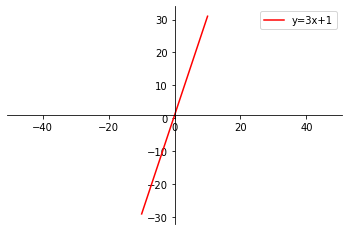

In [72]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

x = np.linspace(-10,10,100)
plt.plot(x, 3*x+1, '-r', label='y=3x+1')
plt.legend(loc='upper right')
plt.plot()
plt.axis('equal')
plt.show()

<div class="alert alert-block alert-info">
<b>Task 1:</b>
<br> 
    Change the code in the cell below to plot a line $y = 2x - 2$<br>
    Don't forget to also update the <code>label</code> property.<br>
    <strong>HINT:</strong> You only need to make changes to this line: <code>plt.plot(x, 3*x+1, '-r', label='y=3x+1')</code><br>
</div>

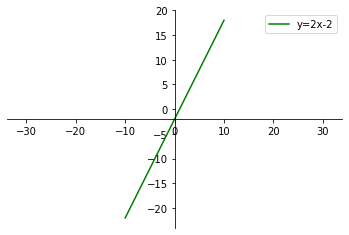

In [73]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

x = np.linspace(-10,10,100)
plt.plot(x, 2*x-2, '-g', label='y=2x-2')
plt.legend(loc='upper right')
plt.plot()
plt.axis('equal')
plt.show()

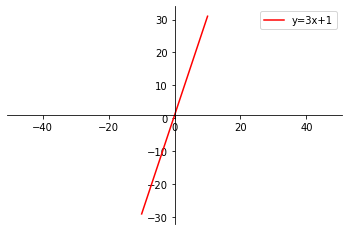

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

x = np.linspace(-10,10,100)
plt.plot(x, 3*x+1, '-r', label='y=3x+1')
plt.legend(loc='upper right')
plt.plot()
plt.axis('equal')
plt.show()

The gradient shows the change in y relative to x:

$$\text{Gradient} = \frac{\text{change in y}}{\text{change in x}}$$

The formula for linear regression is very similar to the straight line equation. 

$$y=\beta_0 + \beta x_i+ \epsilon_i$$

In this case $y$ is our dependent variable (what we want to predict), $x$ is the explanatory variable. $\beta_0$ is the y-intercept. We also have this extra term $\epsilon_i$ which refers to the error in the model. This is the <code>residual error</code> and is the differences between the actual and predicted values. Linear regression assumes an approximate linear relationship between our $x$ and $y$ variables. 

$$ y \approx \beta_0 + \beta_1 x$$

<div class="alert alert-success">
<strong>Note:</strong>
    Essentially the predicted outcome is the result of some model plus some error. There is always some error as the model is only a representation of reality.
    $$\text{Outcome}_i = (model) + \text{error}_i $$
    The model can be a simple representation such as the <code>mean</code>, or a much more complex model. In the case of linear regression, we assume we can model the data with a line of 'best fit' that goes through or as close to as many data points as possible.
</div>

In reality we don't know what the values are for the <code>intercept</code> and the <code>slope</code>. We represent these model <code>parameters</code> (or <code>coefficients</code>) with $\beta_0$ and $\beta_1$ pronounced 'beta'. A <code>regression line</code> or <code>line of best fit</code> is a line that fits the data the best (goes through as many points as possible). If the model fits the line exactly there is a perfect linear relationship between the variables. In reality this is unlikely and there is usually some error (called <code>residuals</code>). The dashed lines in the image below show these residuals. The greater the difference between the data point and the line, the greater the error. We can determine the overall error by summing these residuals. To prevent the positive and negative values canceling each other out, we square the values (to remove the sign) first. So we use the <code>sum of squared values</code>.

<img src="./Topol/lr.png" width="50%" align="center" />

A line with a positive gradient shows a positive relationship between the variables in question whereas as a negative gradient shows a negative relationship between the variables.

<div class="alert alert-success">
<strong>Note:</strong>
    The best regression line can be determined in several ways. One common way is the <code>Ordinary Least Squares (OLS)</code> method. This selects the line with the lowest squared differences. 
</div>

[Return to top](#top)


----------


<a id="correlation"></a>

## 2.0 Correlation 

To better understand regression, it is helpful to first understand correlation. If you are familiar with this concept you can skip over this background. Correlation quantifies the strength of a relationship between 2 variables. Imagine the relationship between temperature and speed at which ice cream melts. The higher the temp, the faster the ice cream melts. The reverse is also true. 

<div class="alert alert-danger">
<strong>Note:</strong>
    Correlation does not imply causation. So just because two variables are correlated does not mean that one causes an effect/phenomenon. There may be other unknown factors. Consider that a large proportion of people die in bed. Does this mean beds are killing people? There could be other factors like disease or old age that are the real underlying cause. 
</div>

If one variable deviates from its mean then we would expect the other variable to vary in a similar way (if there is some relationship between the two). If this is the case, they are said to <code>covary</code>. <code>Variance</code> is the average amount data varies from the mean. To get around the fact that the units of measure used to compare variance can be different, they can be standardized in what is referred to as the <code>standard deviation</code> which measures how much individual members of a group are different from the mean of the group. 

<div class="alert alert-success">
<strong>Note:</strong>
    Variance: ($\bar{x}$ is the mean of the sample and $N$ is the number of observations, $x_i$ are the individual values and $\bar{x}$ is the mean of the sample)<br>
    $$s^2 = \frac{\sum (x_i - \bar{x}^2)}{N-1} $$
</div>

Once we have standardized the variables using the standard deviation, we can calculate the standardized covariance between two variables. This is otherwise known as the <code>correlation coefficient</code>. This was created by Karl Pearson an English mathematician and bio-statistician and is more formally known as the <code>Pearson product-moment correlation coefficient</code>.

<div class="alert alert-success">
<strong>Note:</strong>
    There are other correlation coefficients for dealing with non parametric data such as Spearman's rank correlation coefficient (Spearman's Rho) and where there are multiple ties, Kendall's rank correlation coefficient.
</div>

Let's consider an example. In this case we have some data on the amount of hours that students studied for an exam and the grade they received. We might intuitively guess that students who study for longer would get a higher grade. Let's add some data to 2 lists. The first is the number of hours studied which we will store in a variable called <code>hours_studied</code> the next is the grade percentage and will be stored in <code>grade_pc</code>.

In [75]:
hours_studied = [2, 3, 3, 6, 7, 8, 10, 11, 4, 6, 7, 3, 7, 12]
grade_pc = [40, 55, 53, 65, 67, 70, 71, 80, 46, 62, 66, 50, 66, 91]

We can then display a scatter graph to visually see if there looks like there might be a relationship between these 2 variables. Here we add the lists as parameters to the <code>scatter()</code> function as well as the labels for the x and y axis. At first glance it looks like there is some positive relationship between the 2 variables. We can quantify this by applying a correlation test to the two variables.

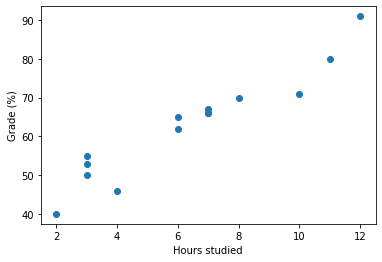

In [76]:
plt.scatter(hours_studied, grade_pc);
plt.xlabel('Hours studied');
plt.ylabel('Grade (%)');

We can import the <code>pearsonr</code> function form the <code>scipy.stats</code> package. Next we pass in our two lists and store the result in a variable called <code>cor</code> for correlation.

In [77]:
from scipy.stats import pearsonr
cor = pearsonr(hours_studied, grade_pc)

When we output the values we get what Python calls a <code>tuple</code>, an ordered unchangeable list. The first value is the Pearson’s correlation coefficient and the second is the 2-tailed p-value. 

In [78]:
cor

(0.9529177986258328, 1.4203874234490775e-07)

<div class="alert alert-success">
<strong>Note:</strong> A p-value is used to accept or reject a null hypothesis. A null hypothesis states there is no statistically significant difference between populations and that any differences are the result of error (e.g. sampling or in the experimental design). The lower the p-value the more confident we can be at rejecting the null hypothesis and that the differences seen are the result of some inherent differences between the groups observed. In fields like psychology and human computer interaction a p-value of $<$ 0.05 is considered sufficient to reject the null hypotheses, where as in medicine it is usually rejected at $<$ 0.001. There is a lot of controversy about the p-value, for example <a href="https://www.nature.com/articles/d41586-019-00857-9" target="_blank">Scientists rise up against statistical significance</a>.    
</div>

To access individual values of the tuple we can use the refer to the item in square brackets. In Python this starts at 0, so the correlation coefficient is at location 0 and the p-value at location 1.

In [79]:
print("Correlation coefficient:", cor[0])
print("p-value: %f" % cor[1])

Correlation coefficient: 0.9529177986258328
p-value: 0.000000


Note that we changed the format of the p-value as this was in scientific notation to something more readable. We could report this as a statistically significant ($\alpha < 0.001$) strong positive correlation $r = .95, p < .001$. All correlation values should range between -1 and 1.

It if often useful to check the explanatory variables that you intend to use for regression against one another using correlation. If any two are highly correlated, it is good practice to remove one of them. This can help to prevent the model from over fitting. One way to do this quickly is to use a correlation matrix. Let's take a look at some real data.

<div class="alert alert-block alert-info">
<b>Task 2:</b>
<br> 
Take a look at the dataset which we will use. This is the <code>Life Expectancy Data</code> <a href="https://www.kaggle.com/kumarajarshi/life-expectancy-who/data" target="_blank">dataset</a> from Kaggle. The data is from the The Global Health Observatory (GHO) data repository under World Health Organization (WHO). Click on the dataset link above and read the description of the data fields (columns) in the section called <code>About this file</code> so that you understand what sort of data is contained in the dataset.
</div>

Next we import the <code>pandas</code> library and load the dataset. This is currently stored as a Comma Separated Values (CSV) file. We load the data and store it in a variable called <code>data</code>. This allows us to store the data in a <code>data frame</code> object which lets us view and manipulate the data as a table. Next we output the first 10 records using the <code>head()</code> function. 

In [80]:
import pandas as pd

In [81]:
path = "./Topol/Life Expectancy Data.csv"
data = pd.read_csv(path)
data.head(10)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   
5  Afghanistan  2010  Developing              58.8            279.0   
6  Afghanistan  2009  Developing              58.6            281.0   
7  Afghanistan  2008  Developing              58.1            287.0   
8  Afghanistan  2007  Developing              57.5            295.0   
9  Afghanistan  2006  Developing              57.3            295.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   
5             74     0.01               79.679367         66.0      1989  ...   
6             77     0.01               56.762217         63.0      2861  ...   
7             80     0.03               25.873925         64.0      1599  ...   
8             82     0.02               10.910156         63.0      1141  ...   
9             84     0.03               17.171518         64.0      1990  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   
5   66.0               9.20         66.0        0.1  553.328940   2883167.0   
6   63.0               9.42         63.0        0.1  445.893298    284331.0   
7   64.0               8.33         64.0        0.1  373.361116   2729431.0   
8   63.0               6.73         63.0        0.1  369.835796  26616792.0   
9   58.0               7.43         58.0        0.1  272.563770   2589345.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   
5                   18.4                 18.4   
6                   18.6                 18.7   
7                   18.8                 18.9   
8                   19.0                 19.1   
9                   19.2                 19.3   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  
5                            0.448        9.2  
6                            0.434        8.9  
7                            0.433        8.7  
8                            0.415        8.4  
9                            0.405        8.1  

[10 rows x 22 columns]

We can use a correlation matrix to view the correlation between variables. 

In [82]:
corr_data = data.corr(method="pearson")
corr_data

Year  Life expectancy   Adult Mortality  \
Year                             1.000000          0.170033        -0.079052   
Life expectancy                  0.170033          1.000000        -0.696359   
Adult Mortality                 -0.079052         -0.696359         1.000000   
infant deaths                   -0.037415         -0.196557         0.078756   
Alcohol                         -0.052990          0.404877        -0.195848   
percentage expenditure           0.031400          0.381864        -0.242860   
Hepatitis B                      0.104333          0.256762        -0.162476   
Measles                         -0.082493         -0.157586         0.031176   
 BMI                             0.108974          0.567694        -0.387017   
under-five deaths               -0.042937         -0.222529         0.094146   
Polio                            0.094158          0.465556        -0.274823   
Total expenditure                0.090740          0.218086        -0.115281   
Diphtheria                       0.134337          0.479495        -0.275131   
 HIV/AIDS                       -0.139741         -0.556556         0.523821   
GDP                              0.101620          0.461455        -0.296049   
Population                       0.016969         -0.021538        -0.013647   
 thinness  1-19 years           -0.047876         -0.477183         0.302904   
 thinness 5-9 years             -0.050929         -0.471584         0.308457   
Income composition of resources  0.243468          0.724776        -0.457626   
Schooling                        0.209400          0.751975        -0.454612   

                                 infant deaths   Alcohol  \
Year                                 -0.037415 -0.052990   
Life expectancy                      -0.196557  0.404877   
Adult Mortality                       0.078756 -0.195848   
infant deaths                         1.000000 -0.115638   
Alcohol                              -0.115638  1.000000   
percentage expenditure               -0.085612  0.341285   
Hepatitis B                          -0.223566  0.087549   
Measles                               0.501128 -0.051827   
 BMI                                 -0.227279  0.330408   
under-five deaths                     0.996629 -0.112370   
Polio                                -0.170689  0.221734   
Total expenditure                    -0.128616  0.296942   
Diphtheria                           -0.175171  0.222020   
 HIV/AIDS                             0.025231 -0.048845   
GDP                                  -0.108427  0.354712   
Population                            0.556801 -0.035252   
 thinness  1-19 years                 0.465711 -0.428795   
 thinness 5-9 years                   0.471350 -0.417414   
Income composition of resources      -0.145139  0.450040   
Schooling                            -0.193720  0.547378   

                                 percentage expenditure  Hepatitis B  \
Year                                           0.031400     0.104333   
Life expectancy                                0.381864     0.256762   
Adult Mortality                               -0.242860    -0.162476   
infant deaths                                 -0.085612    -0.223566   
Alcohol                                        0.341285     0.087549   
percentage expenditure                         1.000000     0.016274   
Hepatitis B                                    0.016274     1.000000   
Measles                                       -0.056596    -0.120529   
 BMI                                           0.228700     0.150380   
under-five deaths                             -0.087852    -0.233126   
Polio                                          0.147259     0.486171   
Total expenditure                              0.174420     0.058280   
Diphtheria                                     0.143624     0.611495   
 HIV/AIDS                                     -0.097857    -0.112675   
GDP            

As this can be quite hard to read, we could represent it as a heatmap diagram instead. Negative correlations are displayed in red and positive in the blue/green colour. The stronger the colour, the stronger the correlation. 

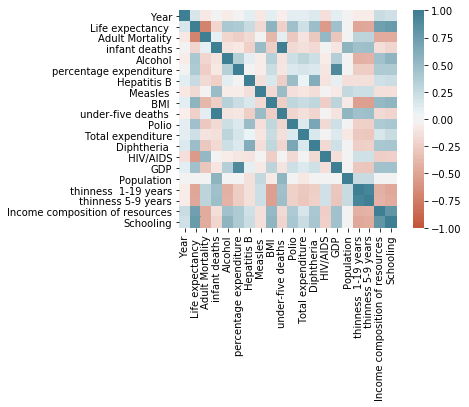

In [83]:
import seaborn as sns
ax = sns.heatmap(corr_data, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)

For some reason the columns in the dataframe have spaces (called whitespace) at the beginning and end of the column names. That means that instead of accessing the column <code>Life expectancy</code> like this <code>data['Life expectancy']</code>, one would need to do it like this <code>data['Life expectancy ']</code>. Note the extra space at the end of the word 'expectancy'. You can see the problem if we loop over all the column names and print them out.

In [84]:
for col in data.columns: 
    print(col)

Country
Year
Status
Life expectancy 
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles 
 BMI 
under-five deaths 
Polio
Total expenditure
Diphtheria 
 HIV/AIDS
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


<div class="alert alert-success">
<strong>Note:</strong> Little problems and issues like this are what takes most of the time in data science. The preprocessing of the data to get it into the required format is by far the most laborious (and often overlooked) task.    
</div>

Fortunately there are more Python functions that can help us with this. The first line removes whitespace from the start of the column name <code>lstrip()</code> where the <code>l</code> is for left. The second line removes whitespace from the end of the column name. <code>r</code> for right. You can see when we print them out a second time that the issue is resolved.

In [85]:
data.columns = data.columns.str.lstrip()
data.columns = data.columns.str.rstrip()

In [86]:
for col in data.columns: 
    print(col)

Country
Year
Status
Life expectancy
Adult Mortality
infant deaths
Alcohol
percentage expenditure
Hepatitis B
Measles
BMI
under-five deaths
Polio
Total expenditure
Diphtheria
HIV/AIDS
GDP
Population
thinness  1-19 years
thinness 5-9 years
Income composition of resources
Schooling


The simplest case of Linear Regression is apply it to just two variables. For this example we will use <code>Life expectancy</code> as the variable we want to predict and <code>Schooling</code> as the predictor. Life expectancy is measured in years and Schooling also is measured in years of schooling. If you recall there was a high correlation between the two variables.

<div class="alert alert-block alert-info">
<b>Task 3:</b>
<br> 
Have a look at the correlation table above.<br>
    1. What was the correlation coefficient for <code>Life expectancy</code> and <code>Schooling</code>?<br>
    2. Is this a positive or negative correlation?<br> 
</div>

$r = 0.751975$. This suggests a strong positive correlation between the two variables. 

Just to help us visualize this, let's create a quick scatter plot to compare the 2 variables visually. 

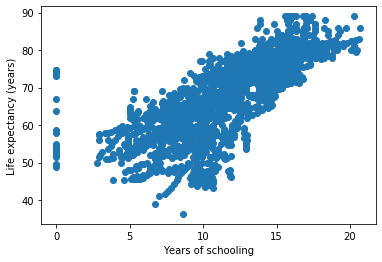

In [87]:
plt.scatter(data['Schooling'], data['Life expectancy']);
plt.ylabel('Life expectancy (years)');
plt.xlabel('Years of schooling');

This implies that people with more years of schooling generally live longer. This is an example of where we need to be cautious about causation. There are clearly other factors at work here. For example higher education may lead to better paid employment which can provide access to better healthcare. We can also see a bunch of people with zero years of schooling who live into their mid to late 70's. 

The next thing we should do is check our two variables to see how many missing values there are in the data.

<div class="alert alert-success">
<strong>Note:</strong> Missing data can cause a variety of issues including:<br>
    <ul>
        <li>Bias in parameter estimation</li>
        <li>Reduces sample representativeness</li>
        <li>Reduction of statistical power</li>
    </ul>
    All of this can lead to invalid conclusions. If you want to find out more about this, have a look at this article <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/#:~:text=Second%2C%20the%20lost%20data%20can,can%20lead%20to%20invalid%20conclusions." target="_blank">The prevention and handling of the missing data</a>.
</div>

There are two useful Python functions for this. We can use <code>isna()</code> to check for missing values and <code>sum()</code> to add them up.

In [88]:
print("The total number of rows:", len(data['Life expectancy']))
print("Missing values in 'Life expectancy':", data['Life expectancy'].isna().sum())
print("Missing values in 'Schooling':", data['Schooling'].isna().sum())

The total number of rows: 2938
Missing values in 'Life expectancy': 10
Missing values in 'Schooling': 163


There are not many missing values in Life expectancy but in the Schooling variable we have around 6% of missing values. To resolve this we will replace these missing values with the mean of the data for that column. We can then check again for missing values. 

In [89]:
# Replace missing values with the mean
data['Life expectancy'] = data['Life expectancy'].fillna(data['Life expectancy'].mean())
data['Schooling'] = data['Schooling'].fillna(data['Schooling'].mean())

# Check again for missing values
print("Missing values in 'Life expectancy':", data['Life expectancy'].isna().sum())
print("Missing values in 'Schooling':", data['Schooling'].isna().sum())

Missing values in 'Life expectancy': 0
Missing values in 'Schooling': 0


<div class="alert alert-success">
<strong>Note:</strong> We could do the same to an entire dataframe like so: <code>df = df.fillna(df.mean())</code> where <code>df</code> is the name of your dataframe.
</div>

[Return to top](#top)


----------


<a id="performingregression"></a>

# 3.0 Performing the Regression

First we need to extract the required columns from the dataframe and ensure they are in the correct format. The <code>reshape()</code> function changes the 1D array into a 2D array which is the required format for the Linear Regressor we will use. 

In [90]:
X = data['Schooling'].values.reshape(-1,1)
y = data['Life expectancy'].values.reshape(-1,1)

Next we need to split the data into a <code>training</code> and <code>test</code> set. We typically use around 20% of the data to test the model and the remaining 80% to carry out the training. We import the required function <code>train_test_split</code> that can do this for us. Next we tell it the <code>test_size=0.2</code>. This is where we specify that we want to use 20% of the data for testing. The results of this function will be stored in the variables <code>X_train, X_test, y_train, y_test</code>.

<img src="./Topol/model.png" width="60%" align="center" />

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Next we can create a new Linear Regressor. We will call this <code>lr</code> for Linear Regressor. We also need to first import this from the <code>sklearn</code> library.

In [92]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  

We can now train the model.

In [93]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now we have trained the model we need to test it. This is what our test variables are used for. So we can try to make some predictions. By convention these are stored in a variable <code>y_pred</code> (y prediction). 

In [94]:
y_pred = lr.predict(X_test)

We can put these values into a dataframe and output the first 10 so we can compare the actual vs predicted values. 

In [95]:
df = pd.DataFrame({'Actual vaues': y_test.flatten(), 'Predicted values': y_pred.flatten()})
df.head(10)

Actual vaues  Predicted values
0          77.3         78.394630
1          66.6         63.213820
2          52.6         64.034404
3          61.5         65.060135
4          60.0         65.060135
5          69.3         65.470427
6          71.1         71.214517
7          81.5         77.574046
8          74.3         72.650540
9          51.9         61.777797

We can also produce a plot of our predicted data vs our test data.

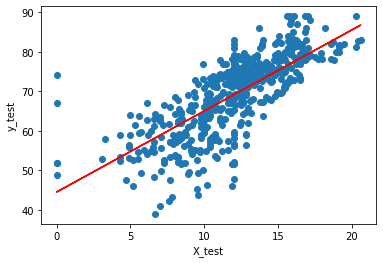

In [96]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red') 
plt.ylabel('y_test');
plt.xlabel('X_test');
plt.show()

<div class="alert alert-success">
<strong>Note:</strong> We can also view information about the slope and intercept like so:<br>
    <code>print(lr.coef_)</code> and <code>print(lr.intercept_)</code>. Where <code>lr</code> is the name of your regressor. 
</div>

We can make predictions using new data using the <code>predict()</code> function like so:

In [97]:
lr.predict([[1.5]])

array([[47.62271722]])

## 3.1 Evaluation of model performance 

There are several metrics that can be used to measure the model's performance. These commonly include:<br>
<ul>
    <li><strong>Residual Sum of Squares (RSS):</strong> The sum of errors (residuals) squared</li>
    <li><strong>Mean Squared Error (MSE):</strong> The average of prediction errors (residuals)</li>
    <li><strong>Root Mean Squared Error (RMSE):</strong> The standard deviation of prediction errors (residuals)</li>
    <li><strong>Mean Absolute Error (MAE):</strong> Measures errors between observed and predicted values</li>
    <li><strong>$R^2$:</strong> Proportion of variance in dependent variable explained by explanatory variable(s) (0-1)</li>
    <li><strong>Adjusted $R^2$:</strong> A modified $R^2$ adjusted for the number of parameters in a model</li>
    <li><strong>F ratio:</strong> Ratio of model fit to data. Significant p-value indicates good fit</li>
</ul>
Several of these metrics are closely related:

The Residual Sum of Squares (RSS)
$$\text{RSS} = \displaystyle\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$
The Mean Squared Error (MSE) is the average of the RSS
$$\text{MSE} = \frac{1}{N}\displaystyle\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$
The Root Mean Squared Error (RMSE) is just the square root of the MSE
$$\text{RMSE} = \sqrt{\frac{1}{N}\displaystyle\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

Again Python has plenty of support for this with <code>sklearn.metrics</code>. Including the <code>mean_squared_error</code>, <code>mean_absolute_error</code> and <code>r2_score </code> functions.

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

In [99]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred)) 
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred))) 
print("Mean Absolute Error (MAE):",  mean_absolute_error(y_test, y_pred))
print("The R^2 score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 37.71280217518058
Root Mean Squared Error (RMSE): 6.141075001592195
Mean Absolute Error (MAE): 4.651692978596332
The R^2 score: 0.5857622448474717


## 3.2 Interpreting the results

With the MSE, the higher the number the larger the error. This implies a greater difference between the observed and predicted values. Values are square so that positive and negative values do not cancel each other out. Unlike a p-value, the value of MSE has no optimal value but as said the lower the better. The same is true for the RMSE. $R^2$ provides a proportion so 1 (100%) would be the best value. This is also useful because other values are expressed in units of y. The $R^2$ is thus independent of the y-scale. This gives us the proportion of variance that is explained by the explanatory variable(s). We can also get standardized beta coefficients showing the how the dependent variable changes in relation to each unit of the independent variable. Another way of indicating the goodness of fit of the model is the F-ratio with an associated p-value, which indicates whether your linear regression model provides a better fit to the data than a model that contains no independent variables. Unfortunately the F-ratio is not provided in the <code>sklearn.metrics</code> package.

<div class="alert alert-success">
<strong>Note:</strong> If you did want to obtain an F-statistic and p-value you could use the <code>statsmodels.api</code> package to run an Ordinary Least Squares (OLS), which would obtain these (and more) statistical properties.
</div>

## 3.3 Multiple linear regression

Multiple regression is useful because it allows you to assess the relationship between two variables while controlling for potential confounders. For example you can look at the relationship between income and life expectancy while controlling for other factors such as age by including age in the model as a predictor. Before you have a go with a new dataset. Let's first quickly run a multiple linear regression with the previous dataset. For analysis you may want to subset your data to examine a specific subset of interest. For example we can look at just the UK rather than all the countries. 

In [100]:
UK = data['Country'] == 'United Kingdom of Great Britain and Northern Ireland'
UK_data = data[UK]
UK_data.head(5)

Country  Year     Status  \
2762  United Kingdom of Great Britain and Northern I...  2015  Developed   
2763  United Kingdom of Great Britain and Northern I...  2014  Developed   
2764  United Kingdom of Great Britain and Northern I...  2013  Developed   
2765  United Kingdom of Great Britain and Northern I...  2012  Developed   
2766  United Kingdom of Great Britain and Northern I...  2011  Developed   

      Life expectancy  Adult Mortality  infant deaths  Alcohol  \
2762             81.2             69.0              3    10.66   
2763             81.0             71.0              3    10.37   
2764             87.0             72.0              3    10.32   
2765             86.0             72.0              3    10.42   
2766             86.0             74.0              3    10.68   

      percentage expenditure  Hepatitis B  Measles  ...  Polio  \
2762                     0.0          NaN       91  ...   96.0   
2763                     0.0          NaN      133  ...   95.0   
2764                     0.0          NaN     1919  ...   95.0   
2765                     0.0          NaN     2092  ...   95.0   
2766                     0.0          NaN     1112  ...   95.0   

      Total expenditure  Diphtheria  HIV/AIDS  GDP  Population  \
2762                NaN        96.0       0.1  NaN         NaN   
2763               9.12        95.0       0.1  NaN         NaN   
2764               9.34        95.0       0.1  NaN         NaN   
2765               9.41        95.0       0.1  NaN         NaN   
2766               9.34        95.0       0.1  NaN         NaN   

      thinness  1-19 years  thinness 5-9 years  \
2762                   0.8                 0.6   
2763                   0.8                 0.5   
2764                   0.8                 0.5   
2765                   0.8                 0.5   
2766                   0.8                 0.5   

      Income composition of resources  Schooling  
2762                              NaN  11.992793  
2763                              NaN  11.992793  
2764                              NaN  11.992793  
2765                              NaN  11.992793  
2766                              NaN  11.992793  

[5 rows x 22 columns]

We can explore this data using visualization. This is covered in more depth in the notebook on <code>Working with data</code>.

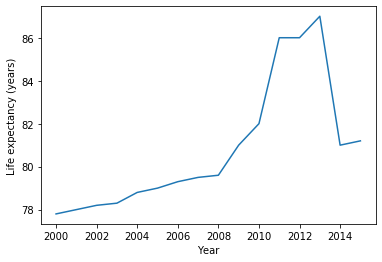

In [101]:
plt.plot(UK_data['Year'], UK_data['Life expectancy']);
plt.ylabel('Life expectancy (years)');
plt.xlabel('Year');
plt.show()

## 3.4 Categorical variable encoding

<div class="alert alert-danger">
<strong>Note:</strong>
    We can't use categorical variables as they are in a regression model. We first need to recode them. This applies to many Machine Learning algorithms. Categories must first be converted into number format. For more information on variable encoding see <a href="https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd" target="_blank">Categorical encoding using Label-Encoding and One-Hot-Encoder</a>.
</div>

The first thing to do is convert the categorical data to integer (numeric) values. To do this we can use the <code>factorize()</code> function. For example the column <code>Country</code> contains the names of countries.

In [102]:
country_data = data['Country']
country_encoded, country_categories = country_data.factorize()

In [103]:
print("Encoded countries:")
print(country_encoded)
print("Country categories:")
print(country_categories)

Encoded countries:
[  0   0   0 ... 192 192 192]
Country categories:
Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Republic of Tanzania', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)',
       'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=193)


The problem with this is that some algorithms will assume that there is some significance in the values used. For example 1 and 10 are less similar than 1 and 2. We can overcome this by using <code>one hot encoding</code>. This works by creating a sparse matrix. Where the value is found a 1 (hot) is used, otherwise a 0 (cold) is used. For example, let's say we had some fruit like so:

<div class="alert alert-success">
<strong>Note:</strong> A sparse matrix is a matrix where most of the values are 0.
</div>

<table>
    <tr>
        <td>id</td>
        <td>Fruit</td>
    </tr>
    <tr>
        <td>0</td>
        <td>Apple</td>
    </tr>
    <tr>
        <td>1</td>
        <td>Orange</td>
    </tr>
    <tr>
        <td>2</td>
        <td>Pear</td>
    </tr>
    <tr>
        <td>3</td>
        <td>Banana</td>
    </tr>
</table>

If we used one-hot encoding it would look like this:

<table>
    <tr>
        <td>id</td>
        <td>Apple</td>
        <td>Orange</td>
        <td>Pear</td>
        <td>Banana</td>
    </tr>
    <tr>
        <td>0</td>
        <td>1</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>1</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
        <td>0</td>
    </tr>
    <tr>
        <td>2</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>3</td>
        <td>0</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
    </tr>
</table>

We can use the <code>OneHotEncoder</code> class from the <code>sklearn.preprocessing</code> package.

In [104]:
from sklearn.preprocessing import OneHotEncoder
ec = OneHotEncoder()
country_encoded_hot = ec.fit_transform(country_encoded.reshape(-1,1))

In [105]:
country_encoded_hot

<2938x193 sparse matrix of type '<class 'numpy.float64'>'
	with 2938 stored elements in Compressed Sparse Row format>

<div class="alert alert-success">
<strong>Note:</strong> In the future this can be done in one go with 
    <code>from sklearn.preprocessing import CategoricalEncoder</code> when it is implemented.
</div>

There is also a way to do this easily using the pandas library with the <code>get_dummies()</code> function that uses one-hot encoding by default. Here we can specify a column and a prefix (i.e. Country_country name). We can then display the first 5 values.

In [106]:
data_encoded = pd.get_dummies(data['Country'], prefix='Country')

In [107]:
data_encoded.head(5)

Country_Afghanistan  Country_Albania  Country_Algeria  Country_Angola  \
0                    1                0                0               0   
1                    1                0                0               0   
2                    1                0                0               0   
3                    1                0                0               0   
4                    1                0                0               0   

   Country_Antigua and Barbuda  Country_Argentina  Country_Armenia  \
0                            0                  0                0   
1                            0                  0                0   
2                            0                  0                0   
3                            0                  0                0   
4                            0                  0                0   

   Country_Australia  Country_Austria  Country_Azerbaijan  ...  \
0                  0                0                   0  ...   
1                  0                0                   0  ...   
2                  0                0                   0  ...   
3                  0                0                   0  ...   
4                  0                0                   0  ...   

   Country_United Republic of Tanzania  Country_United States of America  \
0                                    0                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   Country_Uruguay  Country_Uzbekistan  Country_Vanuatu  \
0                0                   0                0   
1                0                   0                0   
2                0                   0                0   
3                0                   0                0   
4                0                   0                0   

   Country_Venezuela (Bolivarian Republic of)  Country_Viet Nam  \
0                                           0                 0   
1                                           0                 0   
2                                           0                 0   
3                                           0                 0   
4                                           0                 0   

   Country_Yemen  Country_Zambia  Country_Zimbabwe  
0              0               0                 0  
1              0               0                 0  
2              0               0                 0  
3              0               0                 0  
4              0               0                 0  

[5 rows x 193 columns]

Even better, we can do this, add it to the existing data and replace the original column of categorical values all in one go as seen here.

In [108]:
data_encoded_country = pd.concat([data, pd.get_dummies(data['Country'], prefix='Country', dummy_na=True)], axis=1).drop(['Country'],axis=1)

In [109]:
data_encoded_country

Year      Status  Life expectancy  Adult Mortality  infant deaths  \
0     2015  Developing        65.000000            263.0             62   
1     2014  Developing        59.900000            271.0             64   
2     2013  Developing        59.900000            268.0             66   
3     2012  Developing        59.500000            272.0             69   
4     2011  Developing        59.200000            275.0             71   
5     2010  Developing        58.800000            279.0             74   
6     2009  Developing        58.600000            281.0             77   
7     2008  Developing        58.100000            287.0             80   
8     2007  Developing        57.500000            295.0             82   
9     2006  Developing        57.300000            295.0             84   
10    2005  Developing        57.300000            291.0             85   
11    2004  Developing        57.000000            293.0             87   
12    2003  Developing        56.700000            295.0             87   
13    2002  Developing        56.200000              3.0             88   
14    2001  Developing        55.300000            316.0             88   
15    2000  Developing        54.800000            321.0             88   
16    2015  Developing        77.800000             74.0              0   
17    2014  Developing        77.500000              8.0              0   
18    2013  Developing        77.200000             84.0              0   
19    2012  Developing        76.900000             86.0              0   
20    2011  Developing        76.600000             88.0              0   
21    2010  Developing        76.200000             91.0              1   
22    2009  Developing        76.100000             91.0              1   
23    2008  Developing        75.300000              1.0              1   
24    2007  Developing        75.900000              9.0              1   
25    2006  Developing        74.200000             99.0              1   
26    2005  Developing        73.500000             15.0              1   
27    2004  Developing        73.000000             17.0              1   
28    2003  Developing        72.800000             18.0              1   
29    2002  Developing        73.300000             15.0              1   
30    2001  Developing        73.600000             14.0              1   
31    2000  Developing        72.600000             11.0              1   
32    2015  Developing        75.600000             19.0             21   
33    2014  Developing        75.400000             11.0             21   
34    2013  Developing        75.300000            112.0             21   
35    2012  Developing        75.100000            113.0             21   
36    2011  Developing        74.900000            116.0             21   
37    2010  Developing        74.700000            119.0             21   
38    2009  Developing        74.400000            123.0             20   
39    2008  Developing        74.100000            126.0             20   
40    2007  Developing        73.800000            129.0             20   
41    2006  Developing        73.400000            132.0             20   
42    2005  Developing        72.900000            136.0             19   
43    2004  Developing        72.300000             14.0             19   
44    2003  Developing        71.700000            146.0             20   
45    2002  Developing        71.600000            145.0             20   
46    2001  Developing        71.400000            145.0             20   
47    2000  Developing        71.300000            145.0             21   
48    2015  Developing        52.400000            335.0             66   
49    2014  Developing        51.700000            348.0             67   
50    2013  Developing        51.100000            355.0             69   
51    2012  Developing        56.000000            358.0             72   
52    2011  Developing        5

<div class="alert alert-block alert-info">
<b>Task 4:</b>
<br> 
    1. Using the code in the line above the table where we assign a value to the variable <code>data_encoded_country</code>, repeat the one-hot encoding for the <code>Status</code> column and store the result in a variable called <code>all_data_encoded</code>.<br>
    2. Output the first 10 records using the <code>head()</code> function.<br>
    <strong>HINT:</strong> Remember to use the variable <code>data_encoded_country</code> instead of <code>data</code>.
</div>

In [110]:
all_data_encoded = pd.concat([data_encoded_country, pd.get_dummies(data_encoded_country['Status'], prefix='Status', dummy_na=True)], axis=1).drop(['Status'],axis=1)

In [133]:
all_data_encoded.head(10)

Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0  2015            263.0             62     0.01               71.279624   
1  2014            271.0             64     0.01               73.523582   
2  2013            268.0             66     0.01               73.219243   
3  2012            272.0             69     0.01               78.184215   
4  2011            275.0             71     0.01                7.097109   
5  2010            279.0             74     0.01               79.679367   
6  2009            281.0             77     0.01               56.762217   
7  2008            287.0             80     0.03               25.873925   
8  2007            295.0             82     0.02               10.910156   
9  2006            295.0             84     0.03               17.171518   

   Hepatitis B  Measles   BMI  under-five deaths  Polio  ...  \
0         65.0     1154  19.1                 83    6.0  ...   
1         62.0      492  18.6                 86   58.0  ...   
2         64.0      430  18.1                 89   62.0  ...   
3         67.0     2787  17.6                 93   67.0  ...   
4         68.0     3013  17.2                 97   68.0  ...   
5         66.0     1989  16.7                102   66.0  ...   
6         63.0     2861  16.2                106   63.0  ...   
7         64.0     1599  15.7                110   64.0  ...   
8         63.0     1141  15.2                113   63.0  ...   
9         64.0     1990  14.7                116   58.0  ...   

   Country_Venezuela (Bolivarian Republic of)  Country_Viet Nam  \
0                                           0                 0   
1                                           0                 0   
2                                           0                 0   
3                                           0                 0   
4                                           0                 0   
5                                           0                 0   
6                                           0                 0   
7                                           0                 0   
8                                           0                 0   
9                                           0                 0   

   Country_Yemen  Country_Zambia  Country_Zimbabwe  Country_nan  \
0              0               0                 0            0   
1              0               0                 0            0   
2              0               0                 0            0   
3              0               0                 0            0   
4              0               0                 0            0   
5              0               0                 0            0   
6              0               0                 0            0   
7              0               0                 0            0   
8              0               0                 0            0   
9              0               0                 0            0   

   Status_Developed  Status_Developing  Status_nan  Life expectancy  
0                 0                  1           0             65.0  
1                 0                  1           0             59.9  
2                 0                  1           0             59.9  
3                 0                  1           0             59.5  
4                 0                  1           0             59.2  
5                 0                  1           0             58.8  
6                 0                  1           0             58.6  
7                 0                  1           0             58.1  
8                 0                  1           0             57.5  
9                 0                  1           0             57.3  

[10 rows x 217 columns]

Next let's move the column we want to predict (<code>Life expectancy</code>) to the end of the dataset so we can prepare it for the regression analysis. First we use the <code>pop()</code> function to remove the data and store it in a variable (<code>life_expectancy</code>) then we can add it to the end of the dataframe. This rearranging just makes it easier to select the features and label later.

In [112]:
life_expecancy = all_data_encoded.pop('Life expectancy')

In [113]:
all_data_encoded['Life expectancy'] = life_expecancy

In [114]:
all_data_encoded

Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0     2015            263.0             62     0.01               71.279624   
1     2014            271.0             64     0.01               73.523582   
2     2013            268.0             66     0.01               73.219243   
3     2012            272.0             69     0.01               78.184215   
4     2011            275.0             71     0.01                7.097109   
5     2010            279.0             74     0.01               79.679367   
6     2009            281.0             77     0.01               56.762217   
7     2008            287.0             80     0.03               25.873925   
8     2007            295.0             82     0.02               10.910156   
9     2006            295.0             84     0.03               17.171518   
10    2005            291.0             85     0.02                1.388648   
11    2004            293.0             87     0.02               15.296066   
12    2003            295.0             87     0.01               11.089053   
13    2002              3.0             88     0.01               16.887351   
14    2001            316.0             88     0.01               10.574728   
15    2000            321.0             88     0.01               10.424960   
16    2015             74.0              0     4.60              364.975229   
17    2014              8.0              0     4.51              428.749067   
18    2013             84.0              0     4.76              430.876979   
19    2012             86.0              0     5.14              412.443356   
20    2011             88.0              0     5.37              437.062100   
21    2010             91.0              1     5.28               41.822757   
22    2009             91.0              1     5.79              348.055952   
23    2008              1.0              1     5.61               36.622068   
24    2007              9.0              1     5.58               32.246552   
25    2006             99.0              1     5.31                3.302154   
26    2005             15.0              1     5.16               26.993121   
27    2004             17.0              1     4.54              221.842800   
28    2003             18.0              1     4.29               14.719289   
29    2002             15.0              1     3.73              104.516916   
30    2001             14.0              1     4.25               96.205571   
31    2000             11.0              1     3.66               91.711541   
32    2015             19.0             21      NaN                0.000000   
33    2014             11.0             21     0.01               54.237318   
34    2013            112.0             21     0.53              544.450743   
35    2012            113.0             21     0.66              555.926083   
36    2011            116.0             21     0.56              509.002041   
37    2010            119.0             21     0.45              430.717586   
38    2009            123.0             20     0.50              352.063642   
39    2008            126.0             20     0.46               43.087173   
40    2007            129.0             20     0.44              320.323924   
41    2006            132.0             20     0.36              270.240196   
42    2005            136.0             19     0.50                2.548923   
43    2004             14.0             19     0.45              220.393699   
44    2003            146.0             20     0.34               25.018523   
45    2002            145.0             20     0.36              148.511984   
46    2001            145.0             20     0.23              147.986071   
47    2000            145.0             21     0.25              154.455944   
48    2015            335.0             66      NaN                0.000000   
49    2014            348.0             67     8.33     

We won't be able to train the model if the data contains any NA values. To overcome this we can replace those missing values with the mean. This time we do this for the entire dataset.

<div class="alert alert-success">
    <strong>Note:</strong> There are lots of different methods for replacing missing values, this can include imputing the mean, median or using chained equations.
</div>

In [115]:
all_data_encoded.isnull().any()
all_data_encoded = all_data_encoded.fillna(all_data_encoded.mean())

Next we split the data into features <code>X</code> and labels <code>y</code>. By selecting all columns except the last for our features and the last column for the labels (dependent variable). Remember we moved the <code>Life expectancy</code> column to the end. Next we split the dataset into training and testing sets (80% training and 20% testing) as before. Next create an instance of the regressor (called <code>lr</code>), train the model, make some predictions and output some metrics to evaluate the model.

In [116]:
X = all_data_encoded.iloc[:, 0:-1].values
y = all_data_encoded.iloc[:, -1].values

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [118]:
lr = LinearRegression()

In [119]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
y_pred = lr.predict(X_test)

In [121]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred)) 
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred))) 
print("Mean Absolute Error (MAE):",  mean_absolute_error(y_test, y_pred))
print("The R^2 score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 4.089075460601979
Root Mean Squared Error (RMSE): 2.0221462510416943
Mean Absolute Error (MAE): 1.2965751651071968
The R^2 score: 0.9550855587028267


The next line makes it so we can display the whole table in a scrollable window in the notebook environment. Then we display the coefficient for each feature. What this shows is what effect a unit increase or decrease on a feature has. Specifically it shows how the mean of the dependent variable is predicted to change in response to a single unit change of an independent variable while holding all the other variables constant. A positive sign means as the value increases, the mean of the dependent variable increases. If the sign is negative the mean of the dependent variable also decreases.     

In [122]:
pd.set_option("display.max_rows", None)

In [123]:
col_names = list(all_data_encoded.columns)
col_names.pop()
coeffs = pd.DataFrame(lr.coef_, col_names, columns=['Coefficient'])  
coeffs

Coefficient
Year                                                2.675824e-01
Adult Mortality                                    -2.174224e-03
infant deaths                                       7.833580e-02
Alcohol                                            -8.342845e-02
percentage expenditure                              1.500009e-04
Hepatitis B                                        -3.117780e-03
Measles                                            -8.384942e-06
BMI                                                -8.142475e-04
under-five deaths                                  -5.818370e-02
Polio                                               4.695123e-03
Total expenditure                                  -2.836042e-02
Diphtheria                                          4.067670e-03
HIV/AIDS                                           -3.106216e-01
GDP                                                -2.129340e-05
Population                                         -9.858570e-11
thinness  1-19 years                                1.332929e-02
thinness 5-9 years                                  2.042638e-02
Income composition of resources                    -3.383694e-01
Schooling                                           1.284817e-01
Country_Afghanistan                                -9.371254e+00
Country_Albania                                     7.031590e+00
Country_Algeria                                     4.820836e+00
Country_Angola                                     -1.593166e+01
Country_Antigua and Barbuda                         7.783415e+00
Country_Argentina                                   6.771352e+00
Country_Armenia                                     5.294100e+00
Country_Australia                                   2.470785e+00
Country_Austria                                     2.778754e+00
Country_Azerbaijan                                  2.636285e+00
Country_Bahamas                                     6.827837e+00
Country_Bahrain                                     7.131698e+00
Country_Bangladesh                                 -7.854038e-02
Country_Barbados                                    6.427568e+00
Country_Belarus                                     2.476057e+00
Country_Belgium                                     1.559862e+00
Country_Belize                                      1.446797e+00
Country_Benin                                      -9.379664e+00
Country_Bhutan                                     -2.343609e+00
Country_Bolivia (Plurinational State of)           -6.483244e-01
Country_Bosnia and Herzegovina                      7.818725e+00
Country_Botswana                                   -6.137463e+00
Country_Brazil                                      4.642298e+00
Country_Brunei Darussalam                           7.831248e+00
Country_Bulgaria                                   -5.786884e+00
Country_Burkina Faso                               -9.652459e+00
Country_Burundi                                    -1.051962e+01
Country_Cabo Verde                                  3.863211e+00
Country_Cambodia                                   -3.652786e+00
Country_Cameroon                                   -1.056056e+01
Country_Canada                                      1.316297e+01
Country_Central African Republic                   -1.563123e+01
Country_Chad                                       -1.436193e+01
Country_Chile                                       1.119678e+01
Country_China                                       3.748329e+00
Country_Colombia                                    5.236924e+00
Country_Comoros                                    -6.776133e+00
Country_Congo                                      -5.769195e+00
Country_Cook Islands                               -3.893651e-01
Country_Costa Rica                                  1.039667e+01
Country_Croatia                                    -2.580221e+00
Country_Cuba                                        9.334878e+00
Country_Cyprus         

Let's round up the values to remove the scientific notation.

In [124]:
coeffs.round(4)

Coefficient
Year                                                     0.2676
Adult Mortality                                         -0.0022
infant deaths                                            0.0783
Alcohol                                                 -0.0834
percentage expenditure                                   0.0002
Hepatitis B                                             -0.0031
Measles                                                 -0.0000
BMI                                                     -0.0008
under-five deaths                                       -0.0582
Polio                                                    0.0047
Total expenditure                                       -0.0284
Diphtheria                                               0.0041
HIV/AIDS                                                -0.3106
GDP                                                     -0.0000
Population                                              -0.0000
thinness  1-19 years                                     0.0133
thinness 5-9 years                                       0.0204
Income composition of resources                         -0.3384
Schooling                                                0.1285
Country_Afghanistan                                     -9.3713
Country_Albania                                          7.0316
Country_Algeria                                          4.8208
Country_Angola                                         -15.9317
Country_Antigua and Barbuda                              7.7834
Country_Argentina                                        6.7714
Country_Armenia                                          5.2941
Country_Australia                                        2.4708
Country_Austria                                          2.7788
Country_Azerbaijan                                       2.6363
Country_Bahamas                                          6.8278
Country_Bahrain                                          7.1317
Country_Bangladesh                                      -0.0785
Country_Barbados                                         6.4276
Country_Belarus                                          2.4761
Country_Belgium                                          1.5599
Country_Belize                                           1.4468
Country_Benin                                           -9.3797
Country_Bhutan                                          -2.3436
Country_Bolivia (Plurinational State of)                -0.6483
Country_Bosnia and Herzegovina                           7.8187
Country_Botswana                                        -6.1375
Country_Brazil                                           4.6423
Country_Brunei Darussalam                                7.8312
Country_Bulgaria                                        -5.7869
Country_Burkina Faso                                    -9.6525
Country_Burundi                                        -10.5196
Country_Cabo Verde                                       3.8632
Country_Cambodia                                        -3.6528
Country_Cameroon                                       -10.5606
Country_Canada                                          13.1630
Country_Central African Republic                       -15.6312
Country_Chad                                           -14.3619
Country_Chile                                           11.1968
Country_China                                            3.7483
Country_Colombia                                         5.2369
Country_Comoros                                         -6.7761
Country_Congo                                           -5.7692
Country_Cook Islands                                    -0.3894
Country_Costa Rica                                      10.3967
Country_Croatia                                         -2.5802
Country_Cuba                                             9.3349
Country_Cyprus                                           0.9823
Country_Czechia     

The values represent the units of measure in the underlying variable. So for example if <code>HIV/AIDS</code> increases by a unit which is measured in <code>Deaths per 1 000 live births HIV/AIDS (0-4 years)</code> then <code>Life expectancy</code> decreases by 0.3 years. 

<div class="alert alert-danger">
<strong>Note:</strong>
   In a real world case, you would not want to include all the parameters in your model. You would remove those that are irrelevant to your analysis, especially as many datasets are underpowered to include large numbers of predictors (particularly when the $R^2$ is small). You can also use dimensionality reduction methods to reduce the number of features. There are also types of regression like Lasso regression (discussed later) that produce sparse models through variable selection. 
</div>

<div class="alert alert-success">
    <strong>Note:</strong> We can optimize the regression line in Machine Learning using a technique called <code>gradient descent</code>. In fact this technique can be used with many loss (a.k.a error, cost) functions in Machine Learning to improve our models. If you want to know about gradient descent, watch this YouTube <a href="https://www.youtube.com/watch?v=sDv4f4s2SB8" target="_blank">video</a> for an overview.
</div>

## 3.5 Assumptions of Linear Regression

You need to check various <code>assumptions</code> hold true before you can run a linear regression. These include:<br>
<ul>
    <li><strong>Linearity:</strong> There must exist a linear relationship between the dependent and independent variables. The dependent variable must be a linear function of the independent variables.
    <li><strong>Independence of errors:</strong> The residuals should be independent of one another. 
    <li><strong>Homoscedasticity :</strong> (a.k.a. homogeneity of variance). The data points should be similarly scattered around the line. Similar distances from the line. (the opposite of this is heteroscedasticity).
</ul>

[Return to top](#top)


----------


<a id="yourturn"></a>

# 4.0 Your Turn

For this we will use a dataset about medical insurance. We will load the dataset and store it in a variable called <code>insurance_data</code>.

In [125]:
path = "./Topol/Insurance.csv"
insurance_data = pd.read_csv(path)
insurance_data.head(10)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

<div class="alert alert-block alert-info">
<b>Task 5:</b> 
<br> 
1. Read about the dataset <a href="https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv" target="_blank">here</a>.<br>
2. Using the techniques described above, carry out a linear regression on the dataset using <code>charges</code> as the dependent variable.<br> 
3. Evaluate the model.
</div>

[Return to top](#top)


----------


<a id="lassoridgeregression"></a>

# 5.0 Lasso and Ridge Regression

There are many other forms of regression available depending on the data you have. For example predicting a binary (2 categories) outcome we could use <code>Logistic Regression</code>. For data with with a high degree of <code>multicollinearity</code> we could use <code>Ridge Regression</code>. A non-exhaustive list of different types of regression can be seen here:<br>
<ul>
    <li>Linear Regression</li>
    <li>Polynomial Regression</li>
    <li>Logistic Regression</li>
    <li>Ridge Regression</li>
    <li>Lasso Regression</li>
    <li>Elastic Net Regression</li>
    <li>Principal Components Regression</li>
    <li>Support Vector Regression</li>
    <li>Ordinal Regression</li>
    <li>Poisson Regression</li>
    <li>Negative Binomial Regression</li>
    <li>...</li>
</ul>

We will take a closer look at two popular types of regression (<code>Lasso Regression</code>, <code>Ridge Regression</code>) that are used for <code>regularization</code> in data science. Both can be used to reduce the number of features in the model and prevent over-fitting.

<div class="alert alert-success">
    <strong>Note:</strong> We want our Machine Learning algorithms to be <strong>generalizable</strong> so we can use them with different data. If the model is <strong>over-fitting</strong> then the model fits the training data too well, including the noise in the data. In contrast if there is <strong>under-fitting</strong> in the model it doesn't model the training data well. It is often necessary to fine tune the model to try and find a point between these two extremes.
</div>

## 5.1 LASSO (Least Absolute Shrinkage and Selection Operator)

Lasso regression adds whats called a <code>regularization term</code> to the <code>cost function</code>. Lasso can completely eliminate the weights of the least important features in a model by setting them to zero. This helps with feature selection by removing or reducing the weights of the less important features in a model (creating a sparse model). Lasso uses the $L_1$ norm which is the sum of the coefficients absolute values (see $L_1$ and $L_2$ regularization below for more details). 

<div class="alert alert-success">
    <strong>Note:</strong> A cost function is usually a distance or difference between predicted and observed values. It is also referred to as <strong>error</strong> or <strong>loss</strong>.
</div>

Using the previous encoded dataset <code>all_data_encoded</code> we will again split the data in feature <code>X</code> and labels <code>y</code>.

In [126]:
X = all_data_encoded.iloc[:, 0:-1].values
y = all_data_encoded.iloc[:, -1].values

Now we can output the number of features (-1 to exclude the label).

In [127]:
print("Number of features:", len(all_data_encoded.columns)-1)

Number of features: 216


Next we split the data into training and test sets and import the required class (<code>Lasso</code>), create an instance and then train the model. Hopefully you can see that this is exactly the same as the linear regression we performed earlier but with <code>Lasso</code> instead of <code>LinearRegression</code>.

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [129]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

C:\Users\Alan_Davies\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22652.637214899107, tolerance: 21.177751889549878
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

<div class="alert alert-success">
    <strong>Note:</strong> The error message seen above denotes that the model has failed to converge. With iterative algorithms, the output should get closer to some optimal value. This can be a sign that the model did not fit the data very well. We may need to remove additional features before running the Lasso or increase the number of iterations.
</div>

Here we can sum the coefficients that are not 0. We can see we have gone from 216 features in the model down to 15.

In [130]:
print("Number of features:", np.sum(lasso.coef_ != 0))

Number of features: 15


## 5.2 Ridge Regression

Ridge regression uses $L_2$ regularization and aims to keep the model weights as small as possible. It does this by adding a regularization term to the cost function:
$$\alpha \displaystyle\sum_{i=1}^{n} \theta_i^2$$
So unlike the Lasso regression that can have 0 value coefficients, Ridge regression has near-zero coefficients. We can alter the alpha ($\alpha$) parameter to improve the model. Making alpha larger will move the coefficients closer to zero. This can help improve the generalizability of the model but at the cost of a decrease in performance on the training set.

<div class="alert alert-success">
    <strong>Note:</strong> When we create our instance of the ridge class we can pass in a different alpha ($\alpha$) value like so <code>ridge = Ridge(alpha=0.2)</code>.
</div>

Let's have a look at quick example using the same data as before.

In [131]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

C:\Users\Alan_Davies\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.29018e-19): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Let's have a look at some of the metrics from the model.

In [132]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred)) 
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred))) 
print("Mean Absolute Error (MAE):",  mean_absolute_error(y_test, y_pred))
print("The R^2 score:", r2_score(y_test, y_pred))

Mean Squared Error (MSE): 4.089075460601979
Root Mean Squared Error (RMSE): 2.0221462510416943
Mean Absolute Error (MAE): 1.2965751651071968
The R^2 score: 0.9550855587028267


<div class="alert alert-success">
    <strong>Note:</strong> Regularization is used to prevent over-fitting by penalizing the coefficients of the model to improve how generalizable the model is. They also increase robustness against colinearity of ordinary least squares regression. $L_1$ is more robust than $L_2$. If you want to read more about $L_1$ and $L_2$ norms, read this information on <a href="https://www.kaggle.com/residentmario/l1-norms-versus-l2-norms" target-"_blank">Kaggle</a>.  
</div>

#### Notebook details
<br>
<i>Notebook created by <strong>Dr. Alan Davies</strong> with, <strong>Frances Hooley</strong> and <strong>Dr. Jon Parkinson</strong>

Publish date: April 2020<br>
Review date: April 2021</i>

Please give your feedback using the button below:

<a class="typeform-share button" href="https://form.typeform.com/to/YMpwLTNy" data-mode="popup" style="display:inline-block;text-decoration:none;background-color:#3A7685;color:white;cursor:pointer;font-family:Helvetica,Arial,sans-serif;font-size:18px;line-height:45px;text-align:center;margin:0;height:45px;padding:0px 30px;border-radius:22px;max-width:100%;white-space:nowrap;overflow:hidden;text-overflow:ellipsis;font-weight:bold;-webkit-font-smoothing:antialiased;-moz-osx-font-smoothing:grayscale;" target="_blank">Rate this notebook </a> <script> (function() { var qs,js,q,s,d=document, gi=d.getElementById, ce=d.createElement, gt=d.getElementsByTagName, id="typef_orm_share", b="https://embed.typeform.com/"; if(!gi.call(d,id)){ js=ce.call(d,"script"); js.id=id; js.src=b+"embed.js"; q=gt.call(d,"script")[0]; q.parentNode.insertBefore(js,q) } })() </script>

## Notes: